In [245]:
 import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [246]:
movies_df = pd.read_csv('machine learning.csv')
movies_df.head()

,imdb_title_id,original_title,year,genre,country,production_company,duration,votes,budget,usa_gross_income,worldwide_gross_income,rating,metascore
0,tt7374952,Chicano,2018,Drama,USA,Films,108,1016,8000000,1400603,1404646,5.3,46
1,tt0238247,Army,2000,Drama,USA,Films,108,1021,300000,2637726,2637726,6.4,38
2,tt2094890,George,2013,Drama,USA,Productions,107,1037,750000,157937,157937,6.4,77
3,tt0462579,Treatment,2006,Romance,USA,Shrinkwrap,86,1037,900000,83354,83354,5.8,54
4,tt6512428,Indivisible,2018,War,USA,Films,119,1038,2700000,3511417,3589633,5.8,53


In [259]:
# X = movies_df[["duration", "votes", "rating", "metascore", "budget"]]
# y = movies_df["worldwide_gross_income"].values.reshape(-1, 1)
# print(X.shape, y.shape)

X = movies_df[["duration", "votes", "metascore", "worldwide_gross_income", "budget"]]
y = movies_df["rating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4031, 5) (4031, 1)


In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,duration,votes,metascore,worldwide_gross_income,budget
2086,86,47108,75,2437000,777000
1422,118,25417,62,201890,6000000
296,104,4626,34,10372291,90000000
2401,112,62370,62,44567606,10000000
507,105,7718,60,342202,4000000


In [261]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [262]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

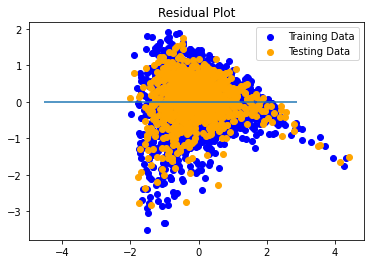

In [263]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [264]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
    
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.6140116893564149
Testing Data Score: 0.6412510199662771


In [265]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.35162168577582753, R2: 0.6412510199662771


In [266]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.35107632465081173, R2: 0.6418074354413857


In [267]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3512228549437942, R2: 0.641657935011583


In [268]:
model.score(X_test_scaled,y_test_scaled)

0.6412510199662771

In [269]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.05).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.35162156887865886, R2: 0.6412511392329256


In [270]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_scaled, y_train_scaled)

forest_predictions = regressor.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, forest_predictions)
r2 = regressor.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3075357724081607, R2: 0.686230545104521
